In [5]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
#Имторт библеотек, Sklearn сначала нужно установаить через pip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

In [12]:
df = pd.read_csv('high_popularity_spotify_data.csv')
df.head(5)

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [17]:
#Выбираем только числовые признаки для обучения моделеей
feature_cols = ['energy', 'tempo', 'danceability', 'loudness', 
                'valence', 'speechiness', 'acousticness', 'duration_ms']
target_col = 'track_popularity'

In [13]:
df.shape

(1686, 29)

In [14]:
df.dropna(inplace =True)
df.shape

(1685, 29)

In [21]:
X = df[feature_cols].values
y_reg = df[target_col].values

In [22]:
threshold = df[target_col].median()
y_clf = (df[target_col] > threshold).astype(int).values

In [23]:
# Масштабирование признаков (ОЧЕНЬ ВАЖНО для градиентного спуска)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Разделение на train и test
# X_train, X_test - признаки
# y_reg_train, y_reg_test - таргет для регрессии
# y_clf_train, y_clf_test - таргет для классификации
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X_scaled, y_reg, y_clf, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (1348, 8)
Размер тестовой выборки: (337, 8)


In [25]:
class LinearRegressionManual:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Инициализация весов нулями
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []
        
        for _ in range(self.n_iterations):
            # 1. Предсказание (Hypothesis): y = wx + b
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # 2. Вычисление градиентов (производных)
            # dw = (2/m) * sum((pred - y) * x)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            # db = (2/m) * sum(pred - y)
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # 3. Обновление весов (Gradient Descent Step)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            # 4. Сохранение функции потерь (MSE) для графика
            loss = np.mean((y_predicted - y)**2)
            self.loss_history.append(loss)
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [27]:
class LogisticRegressionManual:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []
        
        for _ in range(self.n_iterations):
            # 1. Линейная часть и сигмоида
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            # 2. Градиенты
            # Производная функции потерь LogLoss по весам
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # 3. Обновление весов
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            # 4. Функция потерь (Log Loss / Cross Entropy)
            # clip нужен, чтобы избежать log(0)
            y_pred_clipped = np.clip(y_predicted, 1e-15, 1 - 1e-15)
            loss = -np.mean(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))
            self.loss_history.append(loss)
            
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        # Если вероятность > 0.5, то класс 1, иначе 0
        return [1 if i > 0.5 else 0 for i in y_predicted]

In [30]:
lin_model = LinearRegressionManual(learning_rate=0.01, n_iterations=2000)
lin_model.fit(X_train, y_reg_train)
y_reg_pred = lin_model.predict(X_test)

print(" Результаты Линейной Регрессии ")
print(f"MSE: {mean_squared_error(y_reg_test, y_reg_pred):.2f}")
print(f"R2 Score: {r2_score(y_reg_test, y_reg_pred):.4f}")

# --- Обучение Логистической Регрессии ---
log_model = LogisticRegressionManual(learning_rate=0.1, n_iterations=2000)
log_model.fit(X_train, y_clf_train)
y_clf_pred = log_model.predict(X_test)

print("\n Результаты Логистической Регрессии")
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred):.4f}")
print(classification_report(y_clf_test, y_clf_pred))

 Результаты Линейной Регрессии 
MSE: 34.61
R2 Score: 0.0482

 Результаты Логистической Регрессии
Accuracy: 0.5638
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       182
           1       0.53      0.46      0.49       155

    accuracy                           0.56       337
   macro avg       0.56      0.56      0.56       337
weighted avg       0.56      0.56      0.56       337



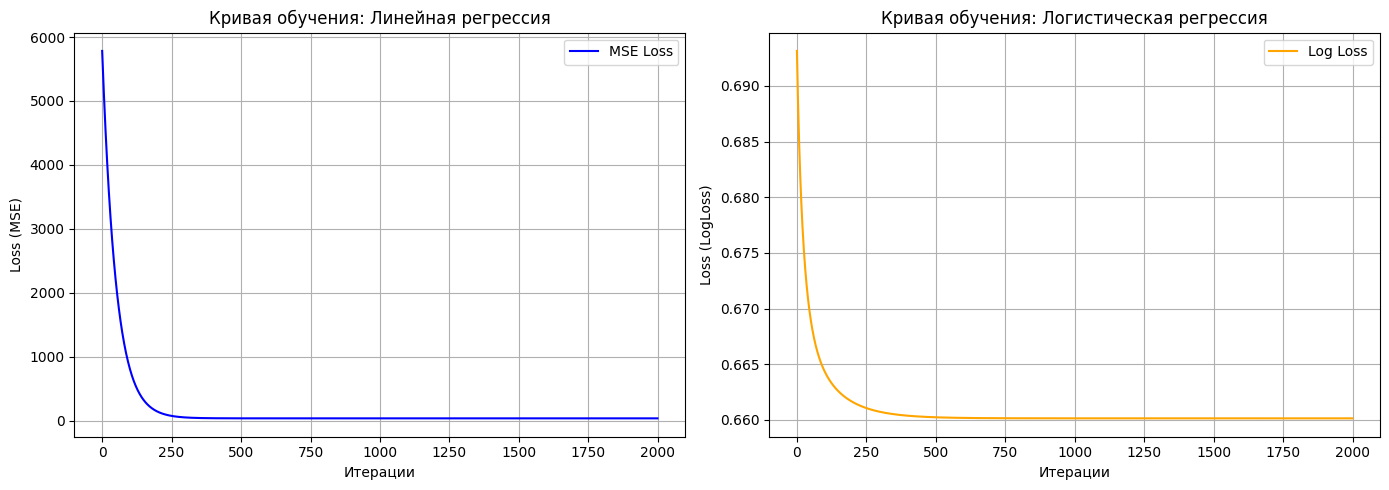

In [29]:
plt.figure(figsize=(14, 5))

# График потерь для Линейной регрессии
plt.subplot(1, 2, 1)
plt.plot(lin_model.loss_history, label='MSE Loss', color='blue')
plt.title('Кривая обучения: Линейная регрессия')
plt.xlabel('Итерации')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.legend()

# График потерь для Логистической регрессии
plt.subplot(1, 2, 2)
plt.plot(log_model.loss_history, label='Log Loss', color='orange')
plt.title('Кривая обучения: Логистическая регрессия')
plt.xlabel('Итерации')
plt.ylabel('Loss (LogLoss)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()